In [1]:
import pandas as pd

Create date series for a time range

In [2]:
pd.date_range('2020-01-01', periods=7, freq='D')

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', freq='D')

In [3]:
pd.to_datetime(['1/2/2018', 'Jan 01, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [4]:
pd.to_datetime(['1/2/2018', '3/1/2018'], format="%d/%m/%Y")

DatetimeIndex(['2018-02-01', '2018-01-03'], dtype='datetime64[ns]', freq=None)

Resampling

In [5]:
df = pd.read_csv(r'C:\Users\nevishwakarma\Documents\Datasets\Data_Udemy\starbucks.csv', index_col=['Date'], parse_dates=['Date'])

In [6]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


In [7]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

<AxesSubplot:xlabel='Date'>

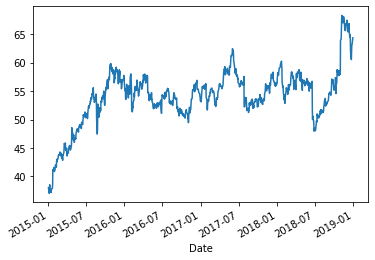

In [8]:
df.Close.plot()

<AxesSubplot:xlabel='Date'>

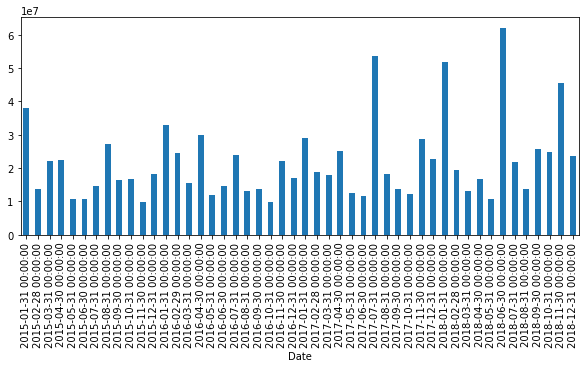

In [9]:
df['Volume'].resample('M').max().plot.bar(figsize=(10,4))

Shifting the timeseries

In [10]:
#Shift forward by one using
df.shift(1)

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,38.0061,6906098.0
2015-01-06,37.2781,11623796.0
2015-01-07,36.9748,7664340.0
2015-01-08,37.8848,9732554.0
...,...,...
2018-12-24,61.3900,23524888.0
2018-12-26,60.5600,6323252.0
2018-12-27,63.0800,16646238.0


In [11]:
# Shift backward
df.shift(-1)

,Close,Volume
Date,,
2015-01-02,37.2781,11623796.0
2015-01-05,36.9748,7664340.0
2015-01-06,37.8848,9732554.0
2015-01-07,38.4961,13170548.0
2015-01-08,37.2361,27556706.0
...,...,...
2018-12-24,63.0800,16646238.0
2018-12-26,63.2000,11308081.0
2018-12-27,63.3900,7712127.0


Rolling Windows

<AxesSubplot:xlabel='Date'>

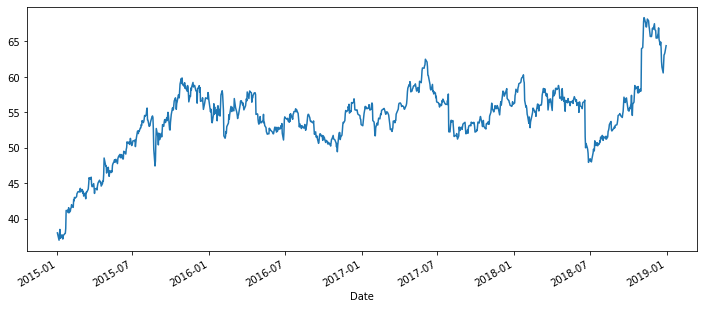

In [13]:
df['Close'].plot(figsize=(12,5))

In [14]:
df.rolling(window=7).mean() # Here since we have daily data so windows depends on the data frequency, so here 7 corresponds to 7 days.

,Close,Volume
Date,,
2015-01-02,NaN,NaN
2015-01-05,NaN,NaN
2015-01-06,NaN,NaN
2015-01-07,NaN,NaN
2015-01-08,NaN,NaN
...,...,...
2018-12-24,63.270000,1.528625e+07
2018-12-26,62.947143,1.525942e+07
2018-12-27,62.765714,1.471157e+07


<AxesSubplot:xlabel='Date'>

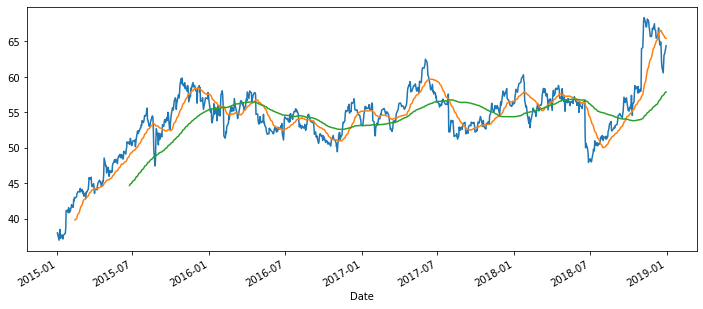

In [18]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=30).mean()['Close'].plot()
df.rolling(window=120).mean()['Close'].plot()

In [20]:
df['Close: 30 Days Mean'] = df['Close'].rolling(window=30).mean()
df['Close: 120 Days Mean'] = df['Close'].rolling(window=120).mean()

<AxesSubplot:xlabel='Date'>

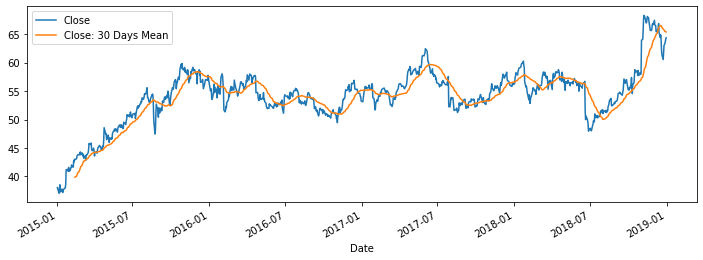

In [21]:
df[['Close', 'Close: 30 Days Mean']].plot(figsize=(12,4))

Here, as we see, rolling will take the mean of the window specified and plot. We can also have the mean of entire values before a certain time period by using expanding.

<AxesSubplot:xlabel='Date'>

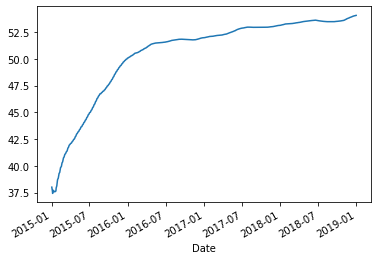

In [22]:
df['Close'].expanding().mean().plot()